In [54]:
import pandas as pd
from pathlib import Path
import os

base_directory = Path(os.getcwd()).parent
file_path = "data\\time_series_60min_singleindex.csv"
path = os.path.join(base_directory, file_path)

print(path)

c:\Energy-Demand-Prediction\data\time_series_60min_singleindex.csv


In [55]:
df = pd.read_csv(path, parse_dates=["utc_timestamp"], index_col="utc_timestamp")

In [56]:
df.columns[0:7]

Index(['cet_cest_timestamp', 'AT_load_actual_entsoe_transparency',
       'AT_load_forecast_entsoe_transparency', 'AT_price_day_ahead',
       'AT_solar_generation_actual', 'AT_wind_onshore_generation_actual',
       'BE_load_actual_entsoe_transparency'],
      dtype='object')

In [57]:
pl_columns = [col for col in df.columns if 'PL' in col]
df_pl = df[pl_columns]
df_pl = df_pl.drop(columns=["PL_load_forecast_entsoe_transparency"])
df_pl

,PL_load_actual_entsoe_transparency,PL_solar_generation_actual,PL_wind_onshore_generation_actual
utc_timestamp,,,
2014-12-31 23:00:00+00:00,NaN,NaN,NaN
2015-01-01 00:00:00+00:00,NaN,NaN,NaN
2015-01-01 01:00:00+00:00,13979.46,NaN,1444.43
2015-01-01 02:00:00+00:00,13453.78,NaN,1509.14
2015-01-01 03:00:00+00:00,13306.00,NaN,1548.33
...,...,...,...
2020-09-30 19:00:00+00:00,20788.89,NaN,1584.12
2020-09-30 20:00:00+00:00,19040.56,NaN,1329.56
2020-09-30 21:00:00+00:00,17697.31,NaN,1135.55


In [58]:
df_pl.isna().sum()

PL_load_actual_entsoe_transparency        3
PL_solar_generation_actual            46237
PL_wind_onshore_generation_actual         3
dtype: int64

In [59]:
df_pl = df_pl.dropna(subset=["PL_load_actual_entsoe_transparency"])
df_pl.isna().sum()

PL_load_actual_entsoe_transparency        0
PL_solar_generation_actual            46234
PL_wind_onshore_generation_actual         0
dtype: int64

<Axes: xlabel='utc_timestamp'>

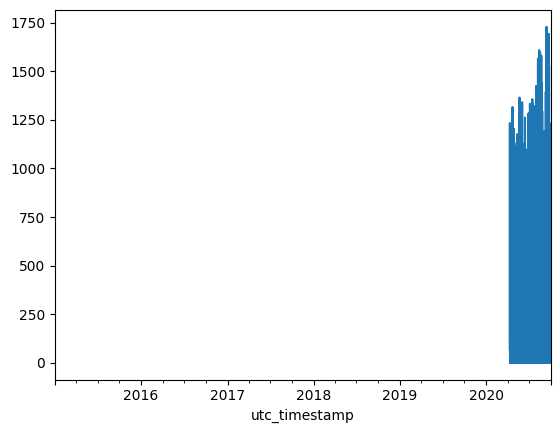

In [60]:
df_pl["PL_solar_generation_actual"].plot()

In [61]:
df_pl["PL_solar_generation_actual"] = df_pl["PL_solar_generation_actual"].fillna(0)
df_pl.isna().sum()

C:\Users\vange\AppData\Local\Temp\ipykernel_13552\1060729082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pl["PL_solar_generation_actual"] = df_pl["PL_solar_generation_actual"].fillna(0)


PL_load_actual_entsoe_transparency    0
PL_solar_generation_actual            0
PL_wind_onshore_generation_actual     0
dtype: int64

<Axes: xlabel='utc_timestamp'>

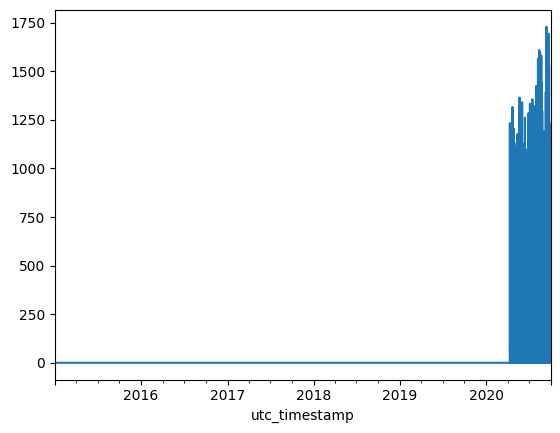

In [62]:
df_pl["PL_solar_generation_actual"].plot()

In [63]:
df_pl.columns = ["PL_load MW", "PL_solar_generation MW", "PL_wind_onshore_generation MW"]

In [64]:
df_pl = df_pl.copy()
df_pl["hour"] = df_pl.index.hour
df_pl["dayofweek"] = df_pl.index.dayofweek
df_pl["month"] = df_pl.index.month
df_pl["is_weekend"] = df_pl.index.dayofweek.isin([5, 6]).astype(int)
df_pl["season"] = df_pl["month"] % 12 // 3 + 1  # 1=Winter, 2=Spring, etc.

In [65]:
import holidays

pl_holidays = holidays.Poland()
df_pl["is_holiday"] = df_pl.index.to_series().apply(lambda x: int(x.date() in pl_holidays))

In [66]:
df_pl["Load_lag_1h"] = df_pl["PL_load MW"].shift(1)
df_pl["Load_lag_24h"] = df_pl["PL_load MW"].shift(24)
df_pl["Load_rolling_mean_24h"] = df_pl["PL_load MW"].rolling(24).mean()
df_pl.isna().sum()

PL_load MW                        0
PL_solar_generation MW            0
PL_wind_onshore_generation MW     0
hour                              0
dayofweek                         0
month                             0
is_weekend                        0
season                            0
is_holiday                        0
Load_lag_1h                       1
Load_lag_24h                     24
Load_rolling_mean_24h            23
dtype: int64

In [67]:
df_pl["Solar_lag_1h"] = df_pl["PL_solar_generation MW"].shift(1)
df_pl["Solar_lag_24h"] = df_pl["PL_solar_generation MW"].shift(24)
df_pl["Solar_rolling_mean_24h"] = df_pl["PL_solar_generation MW"].rolling(24).mean()
df_pl.isna().sum()

PL_load MW                        0
PL_solar_generation MW            0
PL_wind_onshore_generation MW     0
hour                              0
dayofweek                         0
month                             0
is_weekend                        0
season                            0
is_holiday                        0
Load_lag_1h                       1
Load_lag_24h                     24
Load_rolling_mean_24h            23
Solar_lag_1h                      1
Solar_lag_24h                    24
Solar_rolling_mean_24h           23
dtype: int64

In [68]:
df_pl["Wind_lag_1h"] = df_pl["PL_wind_onshore_generation MW"].shift(1)
df_pl["Wind_lag_24h"] = df_pl["PL_wind_onshore_generation MW"].shift(24)
df_pl["Wind_rolling_mean_24h"] = df_pl["PL_wind_onshore_generation MW"].rolling(24).mean()
df_pl.isna().sum()

PL_load MW                        0
PL_solar_generation MW            0
PL_wind_onshore_generation MW     0
hour                              0
dayofweek                         0
month                             0
is_weekend                        0
season                            0
is_holiday                        0
Load_lag_1h                       1
Load_lag_24h                     24
Load_rolling_mean_24h            23
Solar_lag_1h                      1
Solar_lag_24h                    24
Solar_rolling_mean_24h           23
Wind_lag_1h                       1
Wind_lag_24h                     24
Wind_rolling_mean_24h            23
dtype: int64

In [69]:
df_pl = df_pl.dropna()
df_pl.index = df_pl.index.tz_convert("Europe/Warsaw").tz_localize(None)
df_pl

,PL_load MW,PL_solar_generation MW,PL_wind_onshore_generation MW,hour,dayofweek,month,is_weekend,season,is_holiday,Load_lag_1h,Load_lag_24h,Load_rolling_mean_24h,Solar_lag_1h,Solar_lag_24h,Solar_rolling_mean_24h,Wind_lag_1h,Wind_lag_24h,Wind_rolling_mean_24h
utc_timestamp,,,,,,,,,,,,,,,,,,
2015-01-02 02:00:00,13010.58,0.0,2584.13,1,4,1,0,1,0,13258.48,13979.46,14920.307083,0.0,0.0,0.000000,2491.98,1444.43,1953.287083
2015-01-02 03:00:00,13006.90,0.0,2847.95,2,4,1,0,1,0,13010.58,13453.78,14901.687083,0.0,0.0,0.000000,2584.13,1509.14,2009.070833
2015-01-02 04:00:00,13241.45,0.0,3028.90,3,4,1,0,1,0,13006.90,13306.00,14898.997500,0.0,0.0,0.000000,2847.95,1548.33,2070.761250
2015-01-02 05:00:00,13985.83,0.0,3126.80,4,4,1,0,1,0,13241.45,13175.58,14932.757917,0.0,0.0,0.000000,3028.90,1618.57,2133.604167
2015-01-02 06:00:00,15719.83,0.0,3191.15,5,4,1,0,1,0,13985.83,13165.11,15039.204583,0.0,0.0,0.000000,3126.80,1660.39,2197.385833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30 20:00:00,22467.26,0.0,1775.17,18,2,9,0,4,0,23201.60,22738.93,20276.732500,0.0,0.0,200.575417,1723.18,837.16,1062.002500
2020-09-30 21:00:00,20788.89,0.0,1584.12,19,2,9,0,4,0,22467.26,21026.58,20266.828750,0.0,0.0,200.575417,1775.17,851.23,1092.539583
2020-09-30 22:00:00,19040.56,0.0,1329.56,20,2,9,0,4,0,20788.89,19305.53,20255.788333,0.0,0.0,200.575417,1584.12,779.11,1115.475000


In [70]:
base_directory 
name = "data\\PL_data.csv"
full = os.path.join(base_directory, name)
df_pl.to_csv(full)